In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
def foo_k_r(T):
    return k_r0 * math.e**(-E_a/(R_u*T))

In [3]:
def foo_k(T, gas_name):
    if gas_name == 'H2':
        a0 = 0.3975
        a1 = 0.4814/10**4
        a2 = -1.073/10**7
        a3 = 4.6863/10**11
        a4 = -8.5361/10**15
        a5 = 5.6934/10**19
    elif gas_name == 'O2':
        a0 = 0.4697
        a1 = -2.9819/10**4
        a2 = 2.0320/10**7
        a3 = -7.1938/10**11
        a4 = 12.311/10**15
        a5 = -8.0736/10**19
    elif gas_name == 'H2O':
        a0 = 0.3834
        a1 = -1.8579/10**4
        a2 = 0.6266/10**7
        a3 = -1.0528/10**11
        a4 = 0.93554/10**15
        a5 = -0.38512/10**19
    else:
        print('Houston we have a problem')
    return 1 + a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4 + a5*T**5

In [286]:
def foo_alpha(r):
    if r >= 0.000001:
        a = 1 - math.e**(-r)
        return (1-a/r)/a
    else:
        return 0.5

In [287]:
# параметры установки
d = 45*10**(-3) # калибр
S = math.pi*d**2/4 # площадь
W_0 = 0.005 # объем каморы
l_d = 4.5 # длина ствола
m_elem = 0.52 # масса МЭ
p_f = 150 * 10**6 # давление форсирования
k_r0 = 9.87 * 10**8 # предэскп. множитель 

Q_t = 13.4 * 10**6 # энергия образования 1 кг продуктов реакций 
# E_ign = 0.5*10**6 # энергия воспламенителя
E_ign = 0*10**6 # энергия воспламенителя
E_a = 60*10**3 # энергия активации

v_p0 = 0 # начальная скорость
x_p0 = 0 # начальная координата
p_a = 10**5 # атмосфэрное давление

In [342]:
p_0 = 44.5 * 10**6 # начальное давление
T_0 = 300 # начальная температура
R_u = 8.31446262 # универсальная газовая постоянная
hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей

In [343]:
mu_H2 = 2*10**(-3) # молярная масса водорода
mu_O2 = 16*10**(-3) # молярная масса кислорода
mu_H2O = 18*10**(-3) # молярная масса воды

In [344]:
# термодинамика
# R = foo_k_r * () # универсальная газовая постоянная
# m_g_0 = (2*mu_H2+mu_O2) * R_u * T_0/ (p_0 * W_0)
# print(m_g_0)
# rho_0 = m_g_0/W_0
# rho_0 = p_0/(R_u*T_0) # начальная плотность газа
# m_g_0 = rho_0*W_0 # начальная масса газа

# hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей
# ratio_m_O2_and_m_H2_0 = hi_O2_and_H2_0*mu_O2/mu_H2 # начальное соотношение масс газа через мольные доли, скрин "мольные доли.png"

# m_H2_0 = m_g_0 / (ratio_m_O2_and_m_H2_0+1) # начальная масса водорода
# m_O2_0 = m_H2_0 * ratio_m_O2_and_m_H2_0 # начальная масса кислорода

# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода

# С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
# С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода

# C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [345]:
# n_smesi = p_0 * W_0/(R_u * T_0)
# m_O2_0 = n_smesi * mu_O2 / (hi_O2_and_H2_0 * mu_O2/mu_H2+1)
# m_H2_0 = n_smesi * mu_H2 - m_O2_0 / mu_O2 * mu_H2
# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода
# n_H2O_0 = 0 # начальное количества вещества воды

In [346]:
n_smesi = p_0 * W_0/(R_u * T_0)

n_H2_0 = n_smesi/(hi_O2_and_H2_0+1)# начальное количества вещества водорода
n_O2_0 =  n_H2_0 * hi_O2_and_H2_0  # начальное количества вещества кислорода
n_H2O_0 = 0 # начальное количества вещества воды

m_O2_0 = n_O2_0*mu_O2
m_H2_0 = n_H2_0*mu_H2

In [347]:
С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода
C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [348]:
help_value_T_0 = (n_H2_0/(foo_k(T_0,'H2')-1) + n_O2_0/(foo_k(T_0,'O2')-1) + n_H2O_0/(foo_k(T_0,'H2O')-1))**(-1)
k_smesi_T_0 = 1 + n_H2_0*help_value_T_0 + n_O2_0*help_value_T_0 + n_H2O_0*help_value_T_0 # показатель адиабаты смеси для формулы 4.5

In [349]:
tau = 0 # время от начала процесса
C_n_1 = np.array([С_H2_0, С_O2_0, C_H2O_0]) # начальный вектор C
P_n = np.array([0, 0, foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(1/2)]) # начальный вектор Р
D_n = np.array([foo_k_r(T_0)*C_n_1[1]**(1/2), 1/2*foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(-1/2),0]) # начальный вектор D
W_n_1 = W_0 # начальный объем
v_p = v_p0 # начальная скорость

tau_arr = []
C_H2_arr = []
C_O2_arr = []
C_H2O_arr = []
m_H2_arr = []
m_O2_arr = []
m_H2O_arr = []
v_p_arr = []
p_m_arr = []
x_p_arr = []
M_p_arr = []
# rho_arr = []
T_arr = []

tau_arr = np.array(tau_arr)
C_H2_arr = np.array(C_H2_arr)
C_O2_arr = np.array(C_O2_arr)
C_H2O_arr = np.array(C_H2O_arr)
m_H2_arr = np.array(m_H2_arr)
m_O2_arr = np.array(m_O2_arr)
m_H2O_arr = np.array(m_H2O_arr)
v_p_arr = np.array(v_p_arr)
p_m_arr = np.array(p_m_arr)
x_p_arr = np.array(x_p_arr)
M_p_arr = np.array(M_p_arr)
# rho_arr = np.array(rho_arr)
T_arr = np.array(T_arr)

dt=1e-9
x_p = x_p0
T = T_0

schetchik=0
falg_fors=0
while x_p <= l_d: # условие цикла, пока МЭ не покинул дульный срез
    schetchik+=1
    tau += dt # время от начала процесса
#     tau_arr = np.append(tau_arr, tau)
    
    C_n = C_n_1 # вектор С
#     C_H2_arr = np.append(C_H2_arr, C_n[0])
#     C_O2_arr = np.append(C_O2_arr, C_n[1])
#     C_H2O_arr = np.append(C_H2O_arr, C_n[2])
    
    W_n = W_n_1
    
    n_H2 = C_n[0] * W_n # количество вещества водорода
    n_O2 = C_n[1] * W_n # количество вещества кислорода
    n_H2O = C_n[2] * W_n  # количество вещества воды
    
    m_H2 = n_H2 * mu_H2 # масса водорода
    m_O2 = n_O2 * mu_O2 # масса кислорода
    m_H2O = n_H2O * mu_H2O # масса воды
#     m_H2_arr = np.append(m_H2_arr, m_H2)
#     m_O2_arr = np.append(m_O2_arr, m_O2)
#     m_H2O_arr = np.append(m_H2O_arr, m_H2O)
    n_smesi = n_H2 + n_O2 + n_H2O # количество вещества смеси
   

    P_n = np.array([0, 0, foo_k_r(T)*C_n[0]*C_n[1]**(1/2)]) # вектор P
    D_n = np.array([foo_k_r(T)*C_n[1]**(1/2), 1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),0]) # вектор D

    M_p = mu_H2O * C_n[2] * W_n # масса продуктов реакции
#     M_p_arr = np.append(M_p_arr, M_p)

    phi = (1+(m_H2 + m_O2 + m_H2O)/(3*m_elem)) # фиктивность, масса всего
    
    # расчет показателя адиабаты смеси
    help_value = (n_H2/(foo_k(T,'H2')-1) + n_O2/(foo_k(T,'O2')-1) + n_H2O/(foo_k(T,'H2O')-1))**(-1)
    k_smesi = 1 + n_H2*help_value + n_O2*help_value + n_H2O*help_value # показатель адиабаты смеси для формулы 4.5
    
    p_m = (k_smesi-1)/W_n * ((p_0*W_0)/(k_smesi_T_0-1) + Q_t*M_p - E_ign - phi/2*m_elem*v_p**2) # среднебаллистическое давление

    #     p_m_arr = np.append(p_m_arr, p_m)

    T = p_m*W_n/(R_u*n_smesi)
#     T_arr = np.append(T_arr,T)

    if p_m <= p_f and falg_fors == 0:
        dv_p = 0
        
    elif p_m <= p_f and falg_fors == 1:
        dv_p = (p_m - p_a)*S/(phi*m_elem) * dt
        
    elif  p_m > p_f:
        falg_fors = 1
        dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
#     dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
    v_p += dv_p # скорость МЭ
#     v_p_arr = np.append(v_p_arr, v_p)

    dx_p = v_p * dt # диф. координаты МЭ
    
    x_p += dx_p  # координата МЭ
#     x_p_arr = np.append(x_p_arr, x_p)
    
    W_n_1 = W_0 + x_p*S  # Заснарядный объем на n+1 шаге
    
    W_n = W_0 + (x_p-dx_p)*S # Заснарядный объем на n шаге
           
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n)):
        foo_alpha_res[i] = foo_alpha(D_n[i]*dt)
        
    C_n_kr = W_n/W_n_1 * (C_n + (dt *(P_n-C_n*D_n))/(1+foo_alpha_res*D_n*dt)) # Предиктор вектора С
   
    if C_n_kr[1]>=1e-1:
        D_n_kr = (np.array([foo_k_r(T)*C_n_kr[1]**(1/2), 1/2*foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(-1/2),0]) + D_n)/2 # Предиктор вектора D
    else:
         D_n_kr = np.array([0,0,0])
            
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n_kr)):
        foo_alpha_res[i] = foo_alpha(D_n_kr[i]*dt)
    
    if C_n_kr[1]>=1e-1:
        P_n_kr = foo_alpha_res*np.array([0, 0, foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(1/2)]) + (1-foo_alpha_res)*P_n # Предиктор вектора P    
    else:
        P_n_kr = np.array([0, 0, 0])
    C_n_1 = W_n/W_n_1 * (C_n + (dt *(P_n_kr-C_n*D_n_kr))/(1+foo_alpha_res*D_n_kr*dt)) # Корректор вектора С
    
    if schetchik % 10_000 == 0:
        tau_arr = np.append(tau_arr, tau)
        x_p_arr = np.append(x_p_arr, x_p)
        C_H2_arr = np.append(C_H2_arr, C_n[0])
        C_O2_arr = np.append(C_O2_arr, C_n[1])
        C_H2O_arr = np.append(C_H2O_arr, C_n[2])
        m_H2_arr = np.append(m_H2_arr, m_H2)
        m_O2_arr = np.append(m_O2_arr, m_O2)
        m_H2O_arr = np.append(m_H2O_arr, m_H2O)
        M_p_arr = np.append(M_p_arr, M_p)
        v_p_arr = np.append(v_p_arr, v_p)
        T_arr = np.append(T_arr,T)
        p_m_arr = np.append(p_m_arr, p_m)
    if schetchik % 100_000 == 0:
        print(tau, x_p, p_m/10**6, C_n)

0.00010000000000013679 0.0 44.57561717547473 [1.98136763e+03 1.58576833e+04 8.98964609e-01]
0.0001999999999992999 0.0 44.6544238776561 [1.98043035e+03 1.58572146e+04 1.83624335e+00]
0.000299999999999678 0.0 44.7366872361365 [1.97945153e+03 1.58567252e+04 2.81506326e+00]
0.00040000000000125254 0.0 44.82270962496178 [1.97842751e+03 1.58562132e+04 3.83907992e+00]
0.0005000000000028271 0.0 44.91283417544481 [1.97735415e+03 1.58556765e+04 4.91244381e+00]
0.0006000000000044016 0.0 45.00745237230336 [1.97622670e+03 1.58551128e+04 6.03989283e+00]
0.0007000000000059761 0.0 45.10701349458828 [1.97503972e+03 1.58545193e+04 7.22686737e+00]
0.0008000000000075506 0.0 45.21203646404052 [1.97378694e+03 1.58538929e+04 8.47965486e+00]
0.0009000000000091252 0.0 45.32312487375314 [1.97246102e+03 1.58532299e+04 9.80557321e+00]
0.0010000000000081586 0.0 45.44098627485447 [1.97105338e+03 1.58525261e+04 1.12132063e+01]
0.0010999999999988911 0.0 45.566457249014405 [1.96955388e+03 1.58517764e+04 1.27127106e+01]

0.008100000000919549 3.278327081035688 69.41312775685982 [4.94065646e-324 7.29094373e+003 9.42560229e+002]
0.008200000000866913 3.3854335086695104 67.9933648108253 [4.94065646e-324 7.17134212e+003 9.27098346e+002]
0.008300000000814278 3.49364754687652 66.61096709121806 [4.94065646e-324 7.05442371e+003 9.11983343e+002]
0.008400000000761642 3.602946643102593 65.2650597096272 [4.94065646e-324 6.94014018e+003 8.97208971e+002]
0.008500000000709006 3.7133088400576444 63.954759618469694 [4.94065646e-324 6.82844165e+003 8.82768783e+002]
0.00860000000065637 3.8247127613159457 62.679179910952556 [4.94065646e-324 6.71927702e+003 8.68656175e+002]
0.008700000000603735 3.9371375968532956 61.43743358556447 [4.94065646e-324 6.61259432e+003 8.54864426e+002]
0.0088000000005511 4.050563088581308 60.22863682559697 [4.94065646e-324 6.50834094e+003 8.41386734e+002]
0.008900000000498464 4.164969515933457 59.051911840688625 [4.94065646e-324 6.40646388e+003 8.28216249e+002]
0.009000000000445828 4.2803376815488

In [350]:
len(tau_arr)

918

In [363]:
v_p_arr[-1], max(p_m_arr/10**6)

(1175.1078123243838, 169.05096228297097)

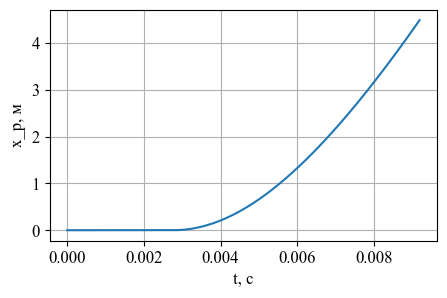

In [352]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, x_p_arr)
plt.xlabel('t, с')
plt.ylabel('x_p, м')
plt.grid()

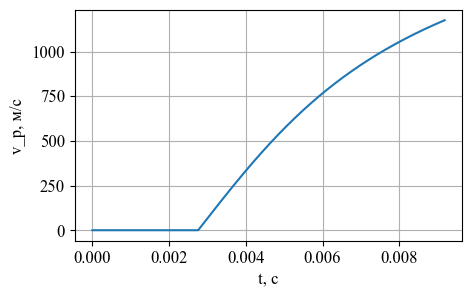

In [353]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, v_p_arr)
plt.xlabel('t, с')
plt.ylabel('v_p, м/с')
plt.grid()

In [354]:
m_H2_arr, m_O2_arr, m_H2O_arr

(array([0.01982178, 0.0198209 , 0.01982001, 0.01981911, 0.01981822,
        0.01981732, 0.01981641, 0.0198155 , 0.01981459, 0.01981368,
        0.01981276, 0.01981183, 0.01981091, 0.01980997, 0.01980904,
        0.0198081 , 0.01980716, 0.01980621, 0.01980526, 0.0198043 ,
        0.01980334, 0.01980238, 0.01980141, 0.01980044, 0.01979946,
        0.01979848, 0.0197975 , 0.01979651, 0.01979551, 0.01979452,
        0.01979351, 0.0197925 , 0.01979149, 0.01979048, 0.01978945,
        0.01978843, 0.0197874 , 0.01978636, 0.01978532, 0.01978428,
        0.01978322, 0.01978217, 0.01978111, 0.01978004, 0.01977897,
        0.0197779 , 0.01977682, 0.01977573, 0.01977464, 0.01977354,
        0.01977244, 0.01977133, 0.01977022, 0.0197691 , 0.01976798,
        0.01976684, 0.01976571, 0.01976457, 0.01976342, 0.01976227,
        0.01976111, 0.01975994, 0.01975877, 0.01975759, 0.01975641,
        0.01975522, 0.01975402, 0.01975282, 0.01975161, 0.0197504 ,
        0.01974918, 0.01974795, 0.01974671, 0.01

In [355]:
# p_m зависит от v_p, v_p зависит от dv_p, что зависит от dt

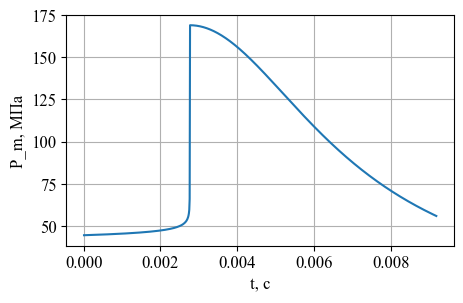

In [356]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, p_m_arr/10**6)
plt.xlabel('t, с')
plt.ylabel('P_m, МПа')
plt.grid()

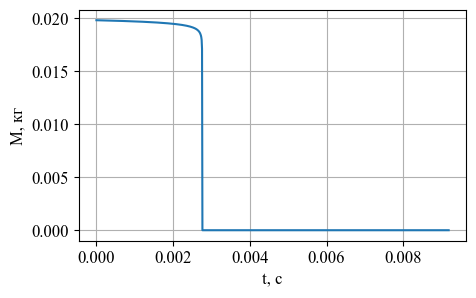

In [357]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, m_H2_arr)
plt.xlabel('t, с')
plt.ylabel('M, кг')
plt.grid()

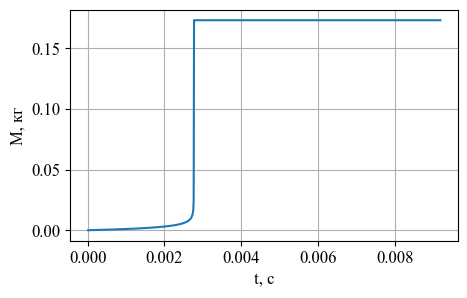

In [358]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, M_p_arr)
plt.xlabel('t, с')
plt.ylabel('M, кг')
plt.grid()

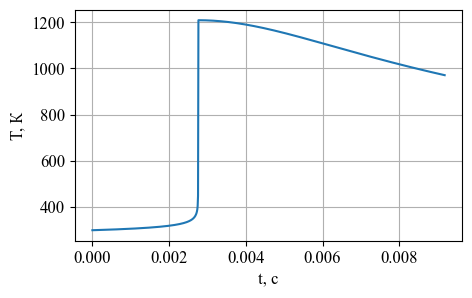

In [359]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, T_arr)
plt.xlabel('t, с')
plt.ylabel('T, К')
plt.grid()